# Project Title:  "Bertha is not my name": Comparative Sentiment Study in *Wide Sargasso Sea* and *Jane Eyre*

## Background & Research Question (1 paragraph)

“Bertha is not my name. You are trying to make me into someone else, calling me by another name.”(Rhys, 1974)-– More than 100 years after the publication of Charlotte Brontë's celebrated novel *Jane Eyre*, Dominican-British author Jean Rhys wrote *Wide Sargasso Sea*. In this work, she liberates Bertha Mason, the “madwoman” confined to the attic, allowing her to reclaim her true name Antoinette, and to tell her own story in her own voice. While countless readers worldwide find an attachment with Jane Eyre, few may muster much empathy for the "madwoman”. Rhys, however, drawing upon her extensive research, deep understanding of the historical context (specifically, British colonization of the Western Hemisphere in the 19th century,) and her profound empathy for this character, recounted the story before Bertha descends into madness. As Gilbert and Gubar famously asserted in their ground-breaking literary criticism *The Madwoman in the Attic*,(2000) “…the madwoman in literature by women is not merely, as she might be in male literature, an antagonist or foil to the heroine. Rather, she is usually in some sense the author’s double, an image of her own anxiety and rage.” (p.78) 
Thus, do Bertha and Jane Eyre, the madwoman and the heroine, two seemingly disparate characters, also serve as both a foil and a mirror to each other? Can the sentiment trend reflect the different portrayals of characters and themes?

![Bertha Mason from the 1966 film 'Jane Eyre'.  ](figures/BerthaMason.jpeg)


## Argument & Objectives

### Argument

This study aims to reveal the distinct sentimental trends embedded in portrayals of the main characters in *Jane Eyre* and *Wide Sargasso Sea*, along with a comparison of the sentiment scores associated with the symbolism of “fire” in these two novels.

### Objectives

* Sentiment analysis: Utilize NLP tools such as NLTK and SpaCy to perform sentiment analysis on these two novels, and to enable the quantification of sentiment tendencies.

* Comparative literary analysis: I will try to engage in comparative literary analysis of these two novels, including exploring the different themes implied in the two novels.

* Data Visualization and Presentation: I attempt to employ data visualization tools to present the results of the sentiment analysis.



## Approach and Method(s)

### Rationale of Project

The rationale behind this research focuses on understanding the sentimental dynamics of the main characters and the symbol of “fire” in Jane Eyre and Wide Sargasso Sea. I utilized VaderSentiment as the main method, this method provides a “normalized, weighted composite score” from the valence scores of words (Hutto & Gilbert, 2014). Additionally, the use of SpaCy for text processing makes dealing with large volumes of text possible, tools like Pandas, Matplotlib, and Seaborn are employed to enhance the clarity of the sentiment trends.

### Data Type 
Textual data from the novels *Jane Eyre* and *Wide *Sargasso Sea*.

### Data Sources
* Rhys, J., & Wyndham, F. (1974). Wide Sargasso Sea. Andre Deutsch; Penguin UK. ISBN 10: 0140818030
* Brontë, C. (1847). Jane Eyre. Project Gutenberg. Retrieved from http://www.gutenberg.org/ebooks/1260


### Methods

In this research, my methodology aligns with Franco Moretti’s idea of “distant reading” (Moretti 2013), which advocates for the macro analysis of large-scale of literary work. I employed a set of Python tools and libraries. The methodology can be outlined as follows:

* Text Extraction：
Firstly, I used Python’s “re. findall()” method to extract all mentions of the key characters (“Jane”, “Bertha”, and “Antoinette”) from the texts.
Then, I employed Pandas library and imported Matplotlib and seaborn, to store and organize these extracted mentions, and visualized the number of mentions in a bar chart format for a clear view.

* Text Processing with SpaCy：
Due to the length of *Jane Eyre*, which surpasses SpaCy’s processing capacity, the very first step involved segmenting the text into separate chapters. This segmentation was conducted with the help of “split” method in Python. The chapter format in *Jane Eyre* is denoted as “Chapter + Roman numeral”. I initially learned techniques for identifying Roman numerals in Python strings. 
Then, I processed each chapter separately and used the loop function to find all the sentences mentioning “Jane” and “Bertha” in *Jane Eyre*. A similar approach was adopted for the *Wide Sargasso Sea*.
The findings were compiled into DataFrames and manual checks were conducted to ensure the data accuracy.

* Sentiment Analysis with Vader Sentiment Algorithm：
For sentiment analysis, I applied the VaderSentiment Algorithm. This sentiment analysis is conducted on a per-DataFrames basis, which allowed me to assess the different sentiments associated with each character in different portrayals.

* Data Visualization with Matplotlib and Seaborn：
In order to improve the clarity and intuitiveness of the data presentation, I applied Matplotlib and Seaborn, with these tools’ help, the plots are more effective, and the comparisons are more obvious.


In [1]:
!pip install pandas nltk spacy
import pandas as pd
import re
import nltk
import spacy

In [2]:
import re

# Load the text content of Jane Eyre
with open("data/JaneEyre.txt", "r", encoding="utf-8") as file:
    jane_eyre = file.read()

# Load the text content of Wide Sargasso Sea
with open("data/Wide.txt", "r", encoding="utf-8") as file:
    wide = file.read()

In [3]:
# find and count occurrences of the names "Bertha" and "Jane" in the text of the novel Jane Eyre.
bertha_mentions_je = re.findall(r"(?i)(Bertha)[\w\s,']*", jane_eyre)
jane_mentions_je = re.findall(r"(?i)(Jane)[\w\s,']*", jane_eyre)

# Print the results
print("Bertha mentions in Jane Eyre:", len(bertha_mentions_je))
print("Jane mentions in Jane Eyre:", len(jane_mentions_je))

Bertha mentions in Jane Eyre: 7
Jane mentions in Jane Eyre: 360


In [4]:
# find and count occurrences of the names "Antoinette" and "Bertha" in the text of the novel Wide Sargasso Sea.
antoinette_mentions_wide = re.findall(r"(?i)(Antoinette)[\w\s,']*", wide)
bertha_mentions_wide = re.findall(r"(?i)(Bertha)[\w\s,']*", wide)

print("Antoinette mentions in Wide Sargasso Sea:", len(antoinette_mentions_wide))
print("Bertha mentions in Wide Sargasso Sea:", len(bertha_mentions_wide))

Antoinette mentions in Wide Sargasso Sea: 76
Bertha mentions in Wide Sargasso Sea: 16


In [5]:
#create a pandas DataFrame to store the number of mentions for different characters across two novels
import pandas as pd
df_mentions = pd.DataFrame({
    "Character": ["Bertha in Jane Eyre", "Jane in Jane Eyre", "Antoinette in Wide Sargasso Sea","Bertha in Wide Sargasso Sea"],
    "Mentions": [len(bertha_mentions_je), len(jane_mentions_je), len(antoinette_mentions_wide),len(bertha_mentions_wide)]
})


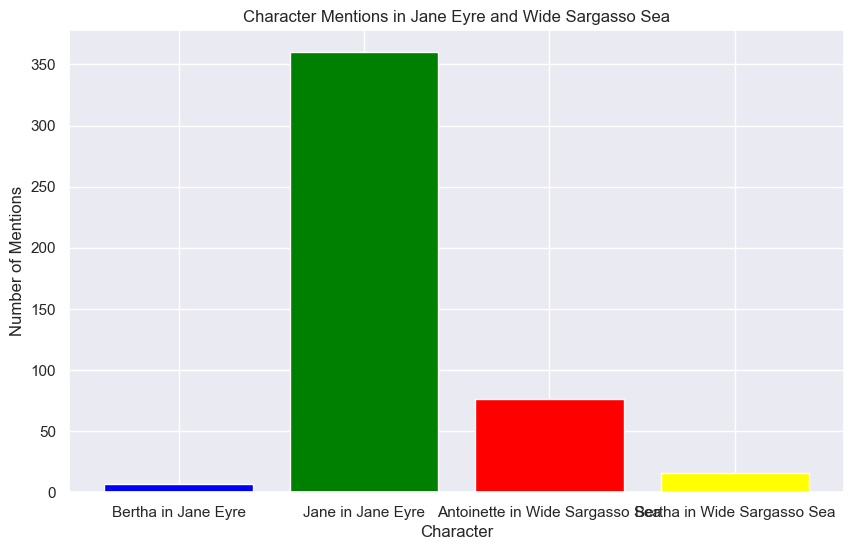

In [6]:
# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# Create the plot
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(df_mentions["Character"], df_mentions["Mentions"], color=['blue', 'green', 'red', 'yellow'])
plt.title("Character Mentions in Jane Eyre and Wide Sargasso Sea")
plt.xlabel("Character")
plt.ylabel("Number of Mentions")

# Save the plot as an image file
plt.savefig('figures/character_mentions_plot.png', bbox_inches='tight')

plt.show()



In this chart, it is evident that due to the differing lengths of the texts, Jane in *Jane Eyre* is mentioned the most, followed by Antoinette in *Wide Sargasso Sea*. Additionally, since both *Jane Eyre* and *Wide Sargasso Sea* employ first-person perspectives, this study might not encompass all potential references. 

The methodology primarily identifies characters by their names, potentially overlooking references to Bertha, Jane, or Antoinette made using pronouns like “she” or other descriptors. 

In *Jane Eyre*, Charlotte Brontë intentionally avoids mentioning the “madwoman” by name, instead using pronouns such as “she” or “that madwoman.” Similarly, in *Wide Sargasso Sea*, Jean Rhys applies this approach to Mr. Rochester; while relatives, servants, neighbors, and even animals in the novel are named or at least given nicknames, the male protagonist remains deliberately nameless. Mr. Rochester is referred to as “I” in his narrative and “he” or “that man” in Antoinette’s parts. This deliberate omission adds complexity to the comparative analysis of the characters.

In [7]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.0 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
# As Jane Eyre's text is too long, the entire book exceeds the upper limit of SpaCy's analysis
# It split the texts on the basis that each chapter starts with the word "CHAPTER" followed by Roman numerals and a newline character. 
# And then prints the total number of chapters found and displays the first 50 characters of the first three chapters to check if the codes work

import re

def split_into_chapters(text):
    chapters = re.split(r'CHAPTER [IVXLCDM]+\n', text)
    return chapters[1:]  
chapters = split_into_chapters(jane_eyre)

print(f"Total chapters found: {len(chapters)}")
for i in range(3):
    print(f"Chapter {i+1} start:", chapters[i][:50]) 

Total chapters found: 38
Chapter 1 start: 


THERE WAS NO POSSIBILITY of taking a walk that 
Chapter 2 start: 


I RESISTED ALL THE WAY: a new thing for me, and
Chapter 3 start: 


THE NEXT THING I remember is, waking up with a 


In [9]:
# Firstly, define a function "find_sentences" to extract sentences that contain a specified character's name. 
# Then, utilize SpaCy to process the text and divide it into sentences (doc.sents). 
# A loop is used to go through each chapter of Jane Eyre to find and record sentences mentioning the characters "Jane" and "Bertha". 

import spacy

# Load the spaCy NLP model
nlp = spacy.load("en_core_web_sm")

def find_sentences(text, character_name):
    doc = nlp(text)
    return [sent.text for sent in doc.sents if character_name in sent.text]

mentions = {"Jane": [], "Bertha": []}

for i, chapter in enumerate(chapters):
    jane_sentences = find_sentences(chapter, "Jane")
    bertha_sentences = find_sentences(chapter, "Bertha")
    mentions["Jane"].extend(jane_sentences)
    mentions["Bertha"].extend(bertha_sentences)

# Finally, print the first three sentences from the lists of mentions for "Jane" and "Bertha". 

print("First 3 mentions of Jane:", mentions["Jane"][:3])
print("First 3 mentions of Bertha:", mentions["Bertha"][:3])


First 3 mentions of Jane: ['"Jane, I don\'t like cavillers or questioners; besides, there is something truly forbidding in a child taking up her elders in that manner.', '"Abbot and Bessie, I believe I gave orders that Jane Eyre should be left in the red-room till I came to her myself."', '"Miss Jane screamed so loud, ma\'am," pleaded Bessie.']
First 3 mentions of Bertha: ['Mr. Briggs calmly took a paper from his pocket, and read out in a sort of official, nasal voice:— "\'I affirm and can prove that on the 20th of October A.D.—(a date of fifteen years back), Edward Fairfax Rochester, of Thornfield Hall, in the county of -, and of Ferndean Manor, in -shire, England, was married to my sister, Bertha Antoinetta Mason, daughter of Jonas Mason, merchant, and of Antoinetta his wife, a Creole, at—church, Spanish Town, Jamaica.', 'I now inform you that she is my wife, whom I married fifteen years ago,—Bertha Mason by name; sister of this resolute personage, who is now, with his quivering limb

In [10]:
# Find and count occurrences of the names "Bertha" and "Jane" in the text of the novel Jane Eyre.reate a pandas DataFrame to store the number of mentions of characters and the sentences
df_jane = pd.DataFrame(mentions["Jane"], columns=["Sentence"])
df_bertha = pd.DataFrame(mentions["Bertha"], columns=["Sentence"])


print("DataFrame for Jane's mentions:")
print(df_jane.head())

print("\nDataFrame for Bertha's mentions:")
print(df_bertha.head())

DataFrame for Jane's mentions:
                                            Sentence
0  "Jane, I don't like cavillers or questioners; ...
1  "Abbot and Bessie, I believe I gave orders tha...
2  "Miss Jane screamed so loud, ma'am," pleaded B...
3  "Come, Miss Jane, don't cry," said Bessie as s...
4  Come here, Miss Jane: your name is Jane, is it...

DataFrame for Bertha's mentions:
                                            Sentence
0  Mr. Briggs calmly took a paper from his pocket...
1  I now inform you that she is my wife, whom I m...
2  Bertha Mason is mad; and she came of a mad fam...
3  Bertha, like a dutiful child, copied her paren...
4        you won't kiss the husband of Bertha Mason?


In [11]:
# Wide Sargasso Sea has three parts, 
# Although SpaCy can process the entire text of the book at once
# It is spilit into three parts as well for easier analysis later

def split_into_parts(text):
    parts = re.split(r'Part \d+', text)
    return parts[1:]  

parts = split_into_parts(wide)


In [12]:
# Find and count occurrences of the names "Antoinette" and "Bertha" in the text of the novel Wide Sea Sargasso.
# To distinguish this "Bertha" from the one in Jane Eyre, I've designated her as "Bertha2."

# For each part, I use the find_sentences function to extract sentences containing the name "Antoinette" 
# And then appends these sentences to the antoinette_mentions list.

antoinette_mentions = []
for part in parts:
    antoinette_sentences = find_sentences(part, "Antoinette")
    antoinette_mentions.extend(antoinette_sentences)
print("First 3 mentions of Antoinette:", antoinette_mentions[:3])

bertha2_mentions = []

for part in parts:
    bertha2_sentences = find_sentences(part, "Bertha")
    bertha2_mentions.extend(bertha2_sentences)
print("First 3 mentions of Bertha:", bertha2_mentions[:3])



First 3 mentions of Antoinette: ['‘Antoinette,’ I said.\n\n', 'You are Antoinette Cosway, that is to say Antoinette Mason.', 'Underneath, I will write my name in fire red, Antoinette Mason, née Cosway, Mount Calvary Convent, Spanish Town, Jamaica, 1839.\n\n']
First 3 mentions of Bertha: ['When he passes my door he says, “Goodnight, Bertha.”', '“I hope you will sleep well, Bertha” – it cannot be worse,’ I said.', '‘Don’t laugh like that, Bertha.’\n\n']


In [13]:
# To create two dataframes and store the sentences mentioning "Antoinette" and "Bertha" 
df_antoinette = pd.DataFrame(antoinette_mentions, columns=["Sentence"])
print("DataFrame for antoinette's mentions:")
print(df_antoinette.head())

df_bertha2 = pd.DataFrame(bertha2_mentions, columns=["Sentence"])
print("DataFrame for bertha's mentions:")
print(df_bertha2.head())

DataFrame for antoinette's mentions:
                                            Sentence
0                          ‘Antoinette,’ I said.\n\n
1  You are Antoinette Cosway, that is to say Anto...
2  Underneath, I will write my name in fire red, ...
3  I want you to be happy, Antoinette, secure, I’...
4  There we were, sheltering from the heavy rain ...
DataFrame for bertha's mentions:
                                            Sentence
0  When he passes my door he says, “Goodnight, Be...
1  “I hope you will sleep well, Bertha” – it cann...
2               ‘Don’t laugh like that, Bertha.’\n\n
3  ‘My name is not Bertha; why do you call me Ber...
4                     I think of you as Bertha.’\n\n


In [14]:
!pip install nltk
!python -m nltk.downloader vader_lexicon
# Here I use Natural Language Toolkit (NLTK): vader

# Copyright (C) 2001-2023 NLTK Project
# Author: C.J. Hutto <Clayton.Hutto@gtri.gatech.edu>
#         Ewan Klein <ewan@inf.ed.ac.uk> (modifications)
#         Pierpaolo Pantone <24alsecondo@gmail.com> (modifications)
#         George Berry <geb97@cornell.edu> (modifications)
#         Malavika Suresh <malavika.suresh0794@gmail.com> (modifications)
# URL: <https://www.nltk.org/>


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ica/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# I improt the SentimentIntensityAnalyzer class from NLTK's sentiment module. 
# This class is used for sentiment analysis to identify and categorize opinions expressed in a piece of text, 
# especially to determine whether the writer's attitude is positive, negative, or neutral.

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


def analyze_sentiment(sentences):
    sentiment_scores = [sia.polarity_scores(sentence) for sentence in sentences]
    return sentiment_scores




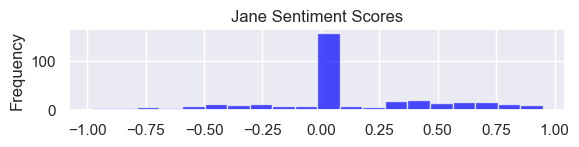

In [16]:
# Conducting sentiment analysis for Jane in Jane Eyre
jane_sentiments = analyze_sentiment(df_jane["Sentence"])

# Creating a DataFrame for Sentiment Scores
df_jane_sentiments = pd.DataFrame(jane_sentiments)

# Plotting the Sentiment Scores

plt.subplot(4, 1, 1)
plt.hist(df_jane_sentiments['compound'], bins=20, color='blue', alpha=0.7)
plt.title('Jane Sentiment Scores')
plt.ylabel('Frequency')

plt.savefig('figures/jane_sentiment_histogram.png')

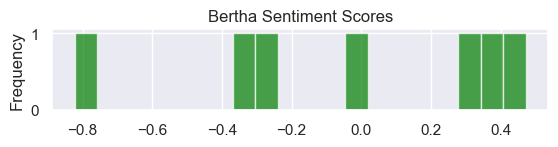

In [17]:
# Similarily to conduct sentiment analysis for Bertha in Jane Eyre

bertha_sentiments = analyze_sentiment(df_bertha["Sentence"])
df_bertha_sentiments = pd.DataFrame(bertha_sentiments)

plt.subplot(4, 1, 2)
plt.hist(df_bertha_sentiments['compound'], bins=20, color='green', alpha=0.7)
plt.title('Bertha Sentiment Scores')
plt.ylabel('Frequency')
plt.savefig('figures/bertha_sentiment_histogram.png')

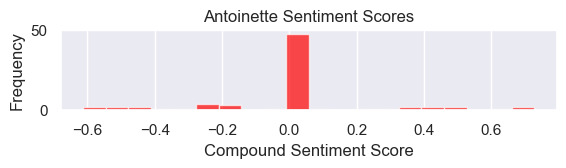

In [18]:
# Similarily to conduct  sentiment analysis for Antoinette in Wide Sargasso Sea 

antoinette_sentiments = analyze_sentiment(df_antoinette["Sentence"])
df_antoinette_sentiments = pd.DataFrame(antoinette_sentiments)

plt.subplot(4, 1, 3)
plt.hist(df_antoinette_sentiments['compound'], bins=20, color='red', alpha=0.7)
plt.title('Antoinette Sentiment Scores')
plt.ylabel('Frequency')
plt.xlabel('Compound Sentiment Score')
plt.savefig('figures/antoinette_sentiment_histogram.png')

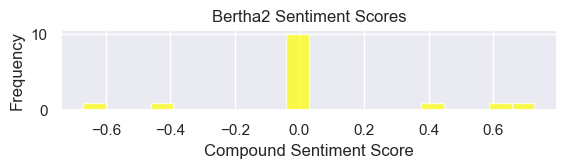

In [19]:
# Similarily to conduct  sentiment analysis for Bertha in Wide Sargasso Sea 

bertha2_sentiments = analyze_sentiment(df_bertha2["Sentence"])
df_bertha2_sentiments = pd.DataFrame(bertha2_sentiments)

plt.subplot(4, 1, 4)
plt.hist(df_bertha2_sentiments['compound'], bins=20, color='yellow', alpha=0.7)
plt.title('Bertha2 Sentiment Scores')
plt.ylabel('Frequency')
plt.xlabel('Compound Sentiment Score')
plt.savefig('figures/bertha2_sentiment_histogram.png')

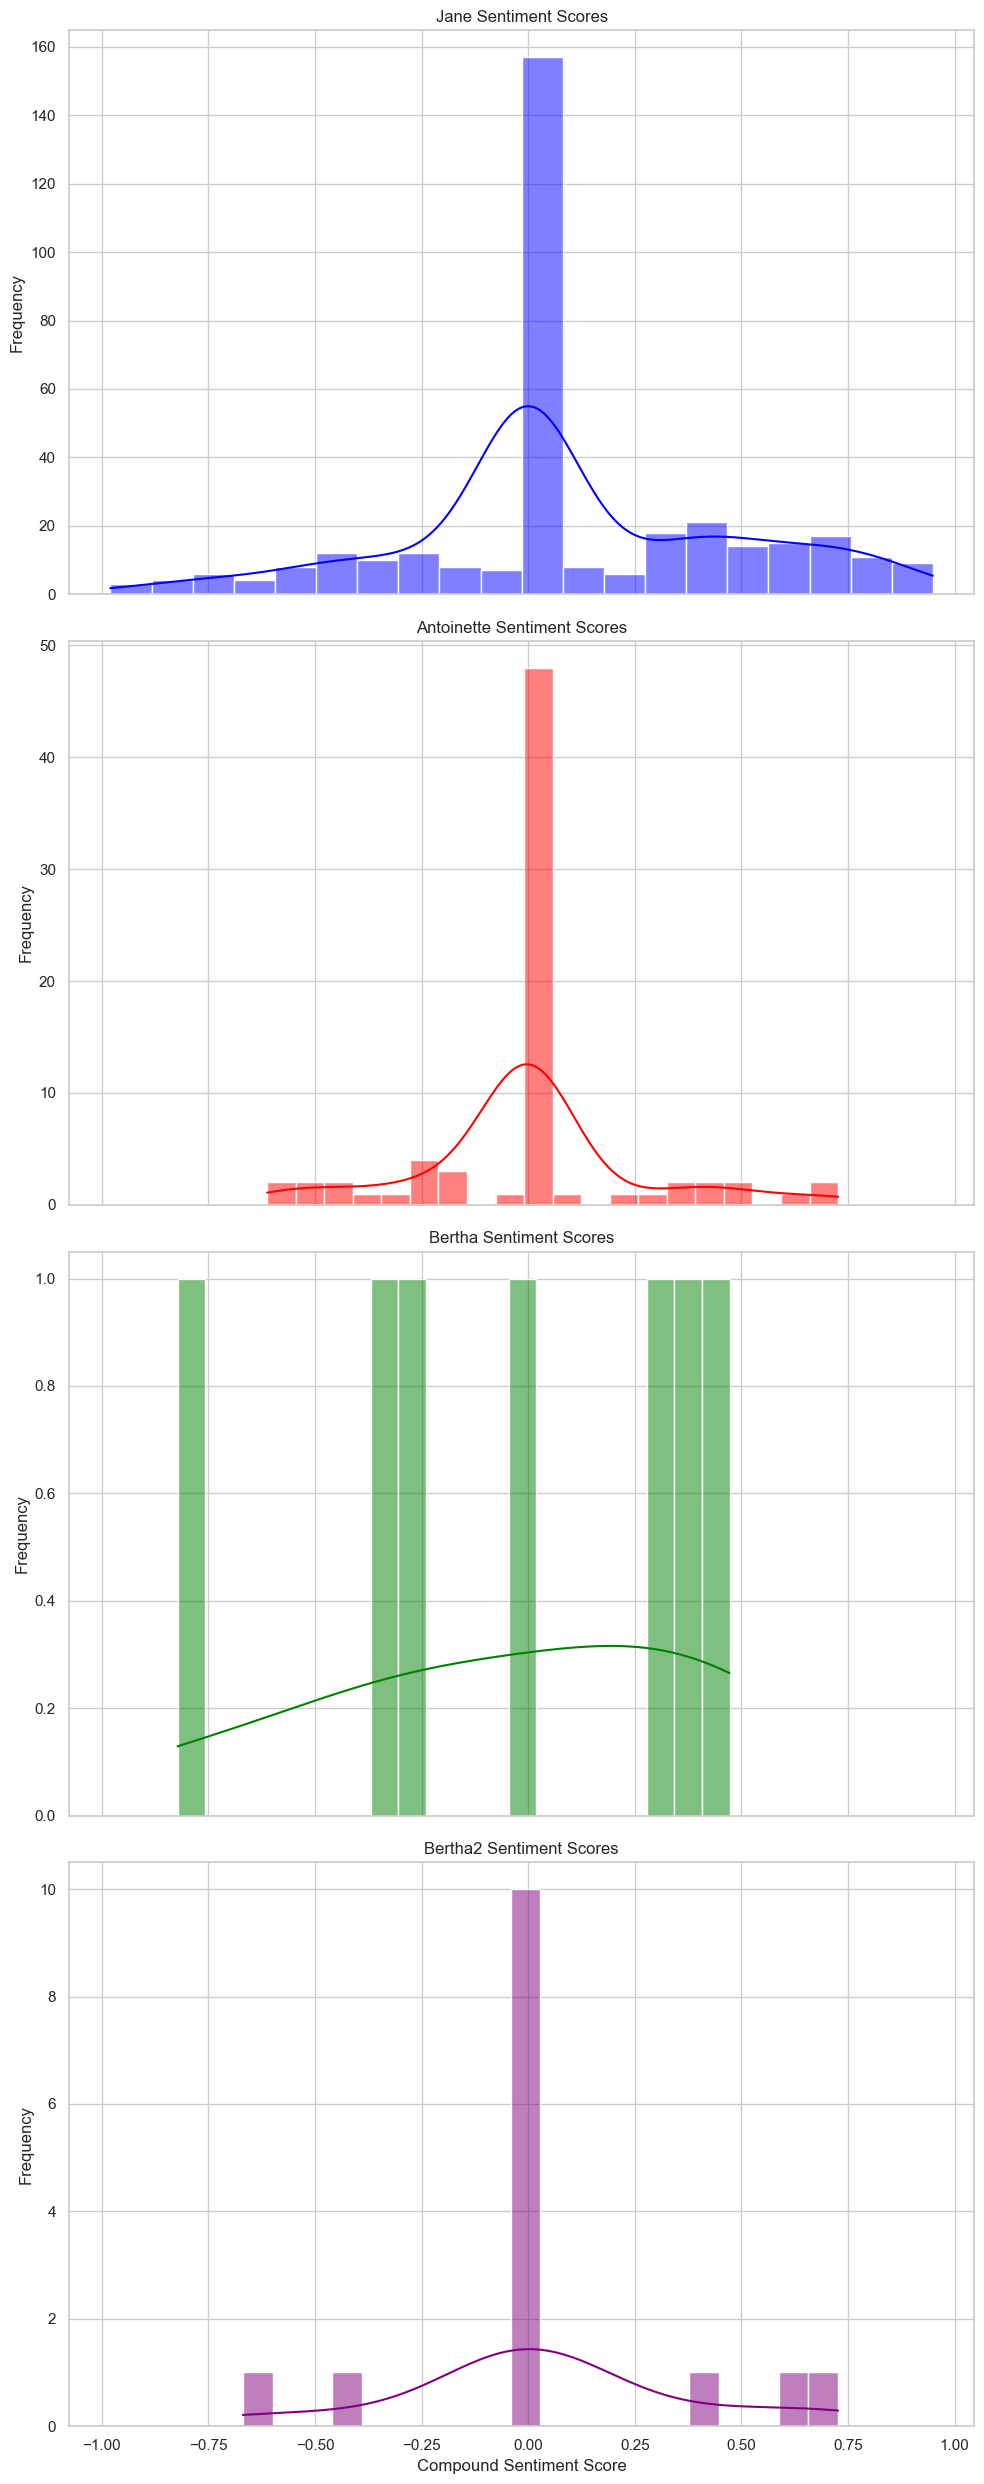

In [20]:
# Import Seaborn to create more aesthetically pleasing and informative histograms of sentiment scores

import seaborn as sns
import matplotlib.pyplot as plt

#Setting Seaborn Style
sns.set(style="whitegrid")
fig, axes = plt.subplots(4, 1, figsize=(10, 25), sharex=True)

# Jane Sentiments
sns.histplot(df_jane_sentiments['compound'], bins=20, ax=axes[0], color='blue', kde=True)
axes[0].set_title('Jane Sentiment Scores')
axes[0].set_ylabel('Frequency')

# Antoinette Sentiments
sns.histplot(df_antoinette_sentiments['compound'], bins=20, ax=axes[1], color='red', kde=True)
axes[1].set_title('Antoinette Sentiment Scores')
axes[1].set_ylabel('Frequency')

# Bertha Sentiments
sns.histplot(df_bertha_sentiments['compound'], bins=20, ax=axes[2], color='green', kde=True)
axes[2].set_title('Bertha Sentiment Scores')
axes[2].set_ylabel('Frequency')

# Bertha2 Sentiments
sns.histplot(df_bertha2_sentiments['compound'], bins=20, ax=axes[3], color='purple', kde=True)
axes[3].set_title('Bertha2 Sentiment Scores')
axes[3].set_xlabel('Compound Sentiment Score')
axes[3].set_ylabel('Frequency')

# Adjusting Layout and Displaying the Plot:

plt.tight_layout()
plt.savefig('figures/sentiment_analysis_histograms.png')

plt.show()


The sentiment analysis revealed in the four charts aligns with the character dynamics discussed by Yurdakul (2019). Jane in *Jane Eyre* and Antoinette in *Wide Sargasso Sea* indeed exhibit strikingly similar sentiment trends, portraying a predominantly neutral sentiment tone throughout their respective narratives.

In contrast, Bertha in *Jane Eyre* emerges as the character with a notably more negative sentiment trend, reflecting her marginalized and tragic role in Brontë's tale as the "madwoman in the attic."

As for "Bertha2," referring to Bertha in "Wide Sargasso Sea," the limited data available diminishes its comparative value.

It's noteworthy that Bertha's mentions primarily occur after Rochester changes her name to "Bertha" and consistently refers to her as such. This naming and framing choice may signify Rochester's idealized emotional image of a wife as one who embodies gentleness and tenderness, which is in contrast to the aggressive and "mad" image of Antoinette.

In [21]:
# For each sentence in the text part, it calculates the compound sentiment score using the Sentiment Intensity Analyzer (SIA). 
# The compound score represents the overall sentiment of the sentence, ranging from -1 (most negative) to 1 (most positive).
# The function returns a list of sentiment scores for each sentence in the text part.

def analyze_part_sentiments(part):
    doc = nlp(part)
    sentiments = [sia.polarity_scores(sent.text)['compound'] for sent in doc.sents]
    return sentiments
part_sentiments = [analyze_part_sentiments(part) for part in parts]

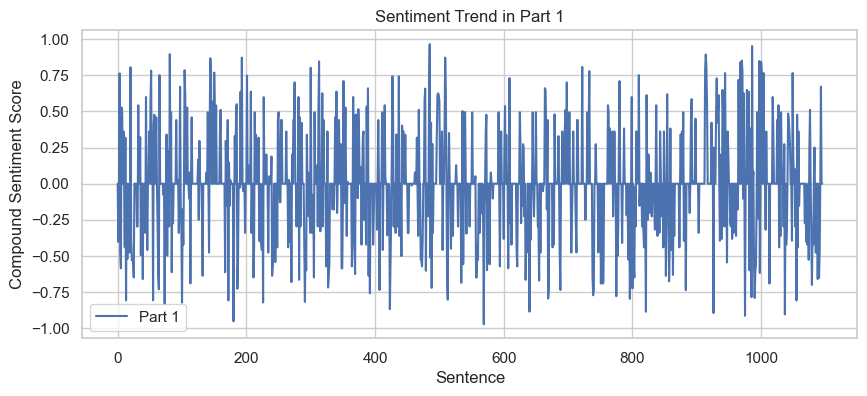

Saved: figures/sentiment_plot_bar_part_1.png


<Figure size 640x480 with 0 Axes>

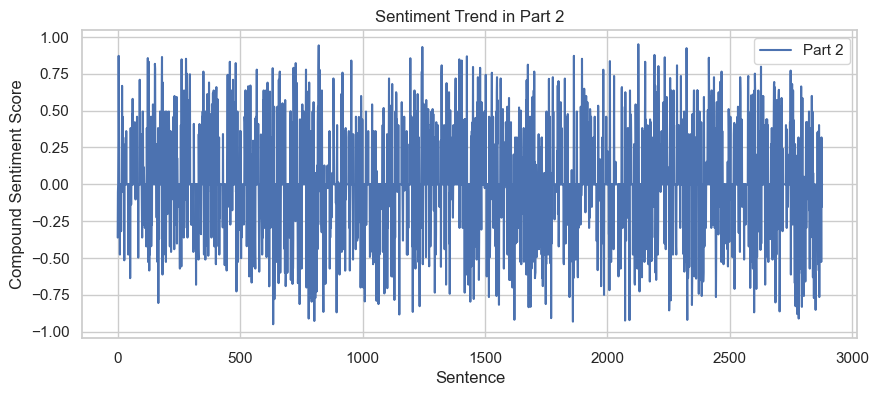

Saved: figures/sentiment_plot_bar_part_2.png


<Figure size 640x480 with 0 Axes>

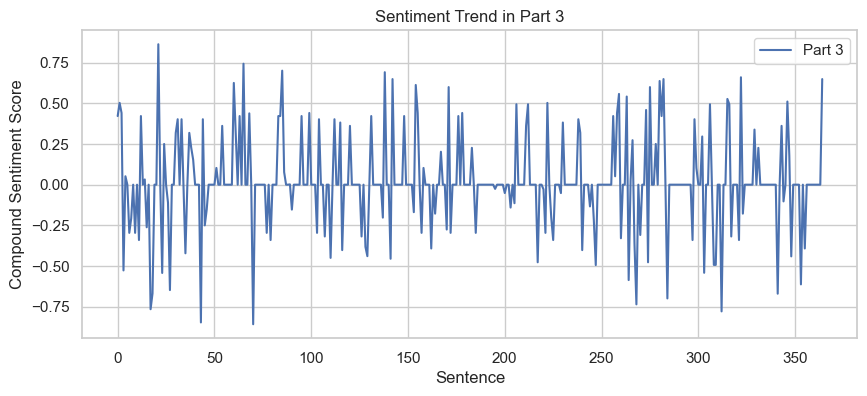

Saved: figures/sentiment_plot_bar_part_3.png


<Figure size 640x480 with 0 Axes>

In [22]:
# I use this loop to iterate through each part of the text and its corresponding list of sentiment scores.

for i, sentiments in enumerate(part_sentiments):
    plt.figure(figsize=(10, 4))
    plt.plot(sentiments, label=f'Part {i+1}')
    plt.title(f'Sentiment Trend in Part {i+1}')
    plt.xlabel('Sentence')
    plt.ylabel('Compound Sentiment Score')
    plt.legend()
    plt.show()
# Show and save the pie chart for the current part
    filename = f'figures/sentiment_plot_bar_part_{i+1}.png'
    plt.savefig(filename)
    print(f'Saved: {filename}')

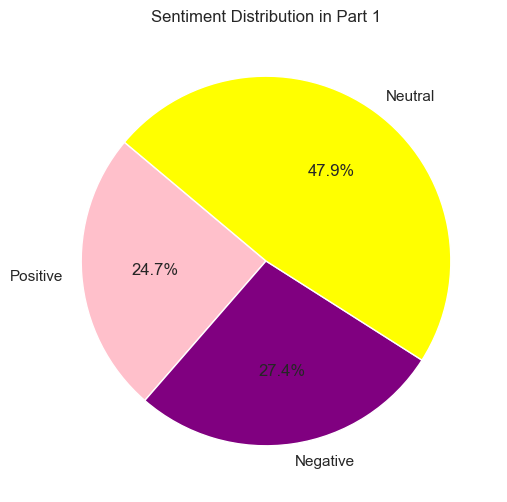

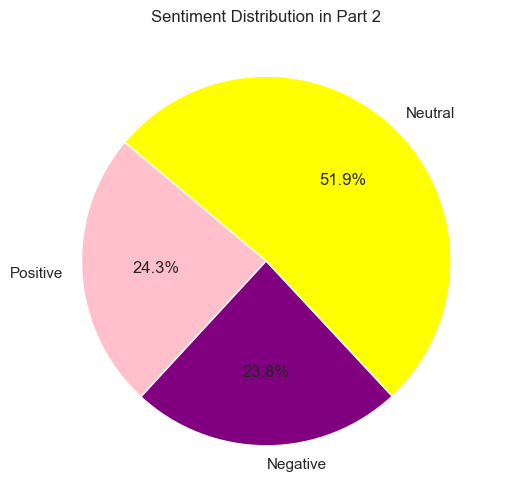

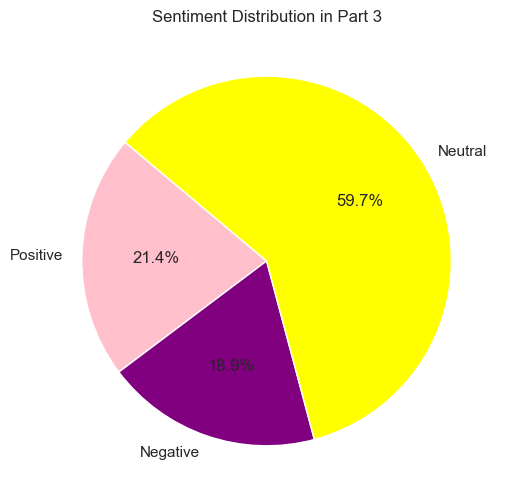

In [23]:
for i, sentiments in enumerate(part_sentiments):
# Count the number of positive, negative, and neutral sentences
    num_positive = sum(1 for score in sentiments if score > 0)
    num_negative = sum(1 for score in sentiments if score < 0)
    num_neutral = sum(1 for score in sentiments if score == 0)
    
    data = [num_positive, num_negative, num_neutral]
    labels = ['Positive', 'Negative', 'Neutral']
    colors = ['Pink', 'Purple', 'Yellow']
    
# Create a pie chart, and re
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution in Part {i+1}')
    
# Show and save the pie chart for the current part
    filename = f'figures/sentiment_plot_pie_part_{i+1}.png'
    plt.savefig(filename)
    plt.show()


In these bar charts and pie charts, I observed variations in sentimental trends and sentence density across the three parts in *Wide Sargasso Sea*. These variations could be valuable insights into the changing perspectives and circumstances within the novel.

In Part One, which is narrated by Antoinette, she narrated her childhood and adolescent experiences on the island. During this phase, emotions run high as Antoinette, as a Creole, grapples with the lack of acceptance from the white community and the rejection from the black community. Her emotional journey is further intensified by the shattered family and her mother's tragic death in a fire.

Moving on to Part Two, the narrative alternates between Rochester and Antoinette. This section contains the highest number of sentences, partly due to Rochester's narration, which introduces a more neutral tone. The sentiment complexity of their interactions becomes apparent, showcasing the intricacies of their relationship.

Finally, in Part Three, Antoinette is taken to England and imprisoned in the attic. Here, her emotional expressions become less frequent, and she becomes increasingly numb. However, there are moments of emotional outbursts, particularly at the beginning and end of this section, emphasizing the emotional turmoil she undergoes.

In [24]:
# Load Wide Sargasso Sea again, to analysize the whole book

def find_sentences_with_word(text, word):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents if word in sent.text.lower()]
    return sentences

with open("data/Wide.txt", "r", encoding="utf-8") as file:
    wide_text = file.read()

# find all the sentences mentioned "fire"
wide_fire_sentences = find_sentences_with_word(wide_text, "fire")


In [25]:
# Import the same toolkit

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# I defined a function called analyze_sentiments that takes a list of sentences as input.

def analyze_sentiments(sentences):
    return [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

wide_fire_sentiments = analyze_sentiments(wide_fire_sentences)

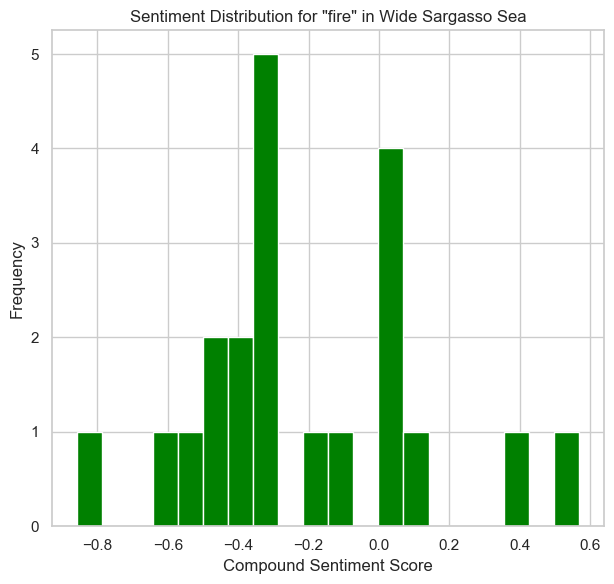

In [26]:
# Here, I created a histogram to visualize the sentiment distribution for the word "fire" in Wide Sargasso Sea
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.hist(wide_fire_sentiments, bins=20, color='green')
plt.title('Sentiment Distribution for "fire" in Wide Sargasso Sea')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')

histogram_filename = 'figures/fire_sentiment_histogram.png'
plt.savefig(histogram_filename)

plt.tight_layout()
plt.show()


In [27]:
# Then, analyze the sentiment of sentences containing the word "fire" in different chapters of Jane Eyre
# The decision to analyze chapters separately rather than analyzing the entire book together
# It is due to text length

jane_eyre_fire_sentiments = []

for chapter in chapters:
    fire_sentences = find_sentences_with_word(chapter, "fire")
    chapter_sentiments = analyze_sentiments(fire_sentences)
# Within each chapter, find sentences that contain the word "fire
    jane_eyre_fire_sentiments.extend(chapter_sentiments)

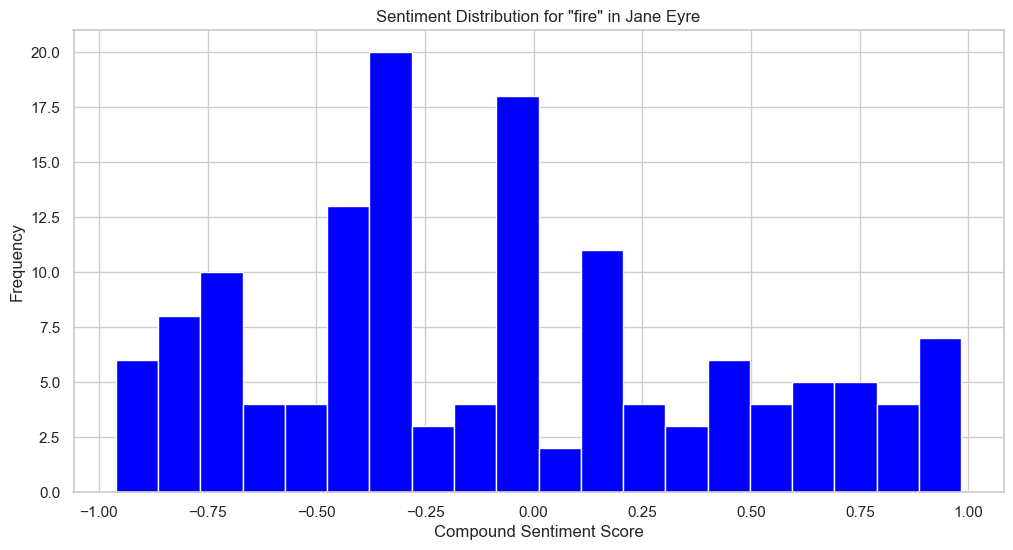

In [28]:
# Similarly,  I created a histogram to visualize the sentiment distribution for the word "fire" in Jane Eyre

plt.figure(figsize=(12, 6))

plt.hist(jane_eyre_fire_sentiments, bins=20, color='blue')
plt.title('Sentiment Distribution for "fire" in Jane Eyre')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')

histogram_filename = 'figures/jane_eyre_fire_sentiment_histogram.png'
plt.savefig(histogram_filename)

plt.show()


In [29]:
# I categorize sentiments into positive, neutral, and negative categories 
# for both "Wide Sargasso Sea" and "Jane Eyre" in relation to the word "fire." 

def categorize_sentiments(sentiments):
    positive = len([s for s in sentiments if s > 0.05])
    neutral = len([s for s in sentiments if -0.05 <= s <= 0.05])
    negative = len([s for s in sentiments if s < -0.05])
    return [positive, neutral, negative]
wide_categories = categorize_sentiments(wide_fire_sentiments)
jane_categories = categorize_sentiments(jane_eyre_fire_sentiments)

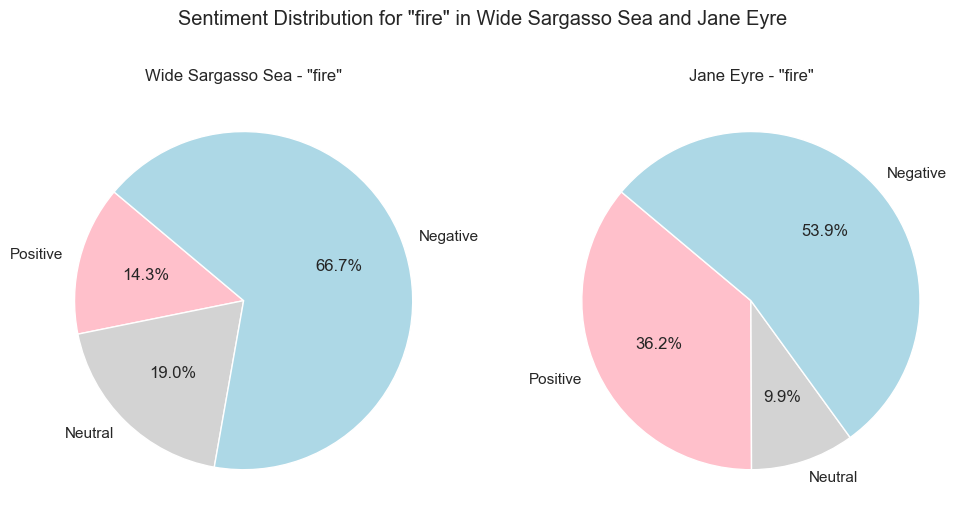

In [30]:
# To save the pie chart visualization 
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(wide_categories, labels=['Positive', 'Neutral', 'Negative'], autopct='%1.1f%%', startangle=140, colors=['pink', 'lightgrey', 'lightblue'])
axs[0].set_title('Wide Sargasso Sea - "fire"')

axs[1].pie(jane_categories, labels=['Positive', 'Neutral', 'Negative'], autopct='%1.1f%%', startangle=140, colors=['pink', 'lightgrey', 'lightblue'])
axs[1].set_title('Jane Eyre - "fire"')

plt.suptitle('Sentiment Distribution for "fire" in Wide Sargasso Sea and Jane Eyre')
pie_chart_filename = 'figures/fire_sentiment_pie_chart.png'
plt.savefig(pie_chart_filename)

plt.show()

To better illustrate the differences, the data has been categorized and presented in the form of a pie chart. It is evident that in *Wide Sargasso Sea,* the word "Fire" is associated with a higher prevalence of negative sentiment. This aligns with the plot, as Antoinette witnessed a tragic fire incident in her childhood where her mother saved her little brother, but still to lose him shortly thereafter, leading to her mother's descent into madness. In her married life, Antoinette avoids discussing this traumatic event, but the fire remains like a dormant seed in her psyche. 

In contrast, in *Jane Eyre,* the word "Fire" carries a more complex and positive emotional connotation. As mentioned in Bergan, M.'s dissertation, "fire" symbolizes not only anger and revenge but also love and desire. The faint glimmer of a fire also signifies the end of life. Therefore, fire in *Jane Eyre* encompasses a broader range of emotions and symbolism. (Bergan, 2021).


## Analysis
Please see the discussion and analysis in the sessions following the visualization charts.

## Conclusions 

Through my research, I have found that conducting quantitative analysis using Python can provide a visual representation of sentiment trends in two books, reflecting both the differences and similarities in how two seemingly identical characters are portrayed by different authors. However, it is important to acknowledge the limitations of this approach. One significant challenge is the difficulty in accurately identifying all character- related sentences, particularly in narratives like *Jane Eyre* and *Wide Sargasso Sea,* where the first-person perspective may lead to the subtle blending of character tones and hinder the portrayal of the narrator's evolving viewpoints. Moreover, the choice of sentiment analysis algorithms should be made with careful consideration, as they can significantly influence the accuracy of the analysis. Additionally, the accuracy of the analysis depends on the extent to which characters are mentioned. In cases where adequate contextual clues are lacking, such as Bertha in *Wide Sargasso Sea,* meaningful analysis becomes challenging, despite the importance of these characters. This issue can result in underrepresentation. It is evident that there is a need to refine the methodology and explore more advanced techniques to address these challenges in future research. 




## References

Rhys, J., & Wyndham, F. (1974). Wide Sargasso Sea. Andre Deutsch.

Hutto, C. J., & Gilbert, E. E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014. 

Gilbert, S. M., & Gubar, S. (2000). The madwoman in the attic: the woman writer and the nineteenth-century literary imagination (2nd ed.). Yale University Press.

Yurdakul, S. (2019). THE OTHER SIDE OF THE COIN: THE OTHERNESS OF BERTHA / ANTOINETTE MASON IN CHARLOTTE BRONTË’S JANE EYRE AND JEAN RHYS’S WIDE SARGASSO SEA. British and American Studies: B.A.S, 25(25), 63–69.

Bergan, M. (2021). “Can You Tell When There Is a Good Fire?”: Haunting and Ecogothic Violence in Jane Eyre, Great Expectations, and the Moonstone. ProQuest Dissertations Publishing.

In [1]:
pip install nbconvert


Note: you may need to restart the kernel to use updated packages.
